In [2]:
import pandas as pd 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from scipy import stats
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
import matplotlib.pyplot as plt

In [144]:
reviews = pd.read_csv('reviews.csv')

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [17]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [145]:
reviews.dropna(subset =['comments'],how='any',axis=0,inplace=True)

In [19]:
import re 
import string 

In [20]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [21]:
reviews['comments'] = reviews['comments'].map(alphanumeric).map(punc_lower)

In [22]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...
3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aisuluomar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import numpy as np

In [25]:
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english',ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(reviews['comments'])
print(feature_matrix.shape)


(84831, 50)


In [26]:
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [35]:
#commenting it as it takes a long time to run 
reviews['polarity'] = reviews.comments.map(vader_polarity_compound)

In [36]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...,0.7717
1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,0.9864
2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...,0.8625
3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,0.9776


In [37]:
reviews.to_csv('reviews_p.csv')

In [6]:
df_n = pd.read_csv('reviews_p.csv')

In [7]:
df_n.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...,0.7717
1,1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,0.9864
2,2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...,0.8625
3,3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,0.8313
4,4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,0.9776


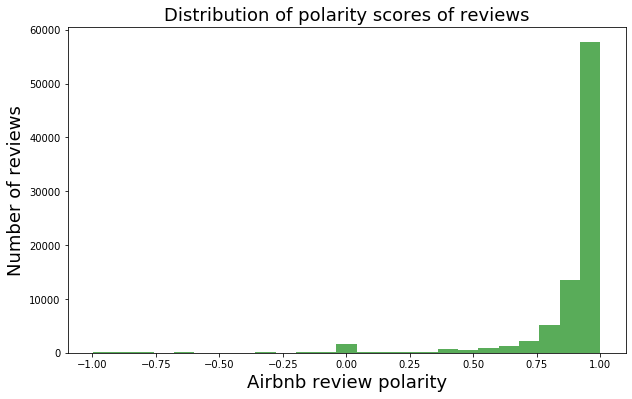

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df_n.polarity, bins=25, color='g', alpha=0.65)
plt.title('Distribution of polarity scores of reviews',fontsize=18)
plt.xlabel('Airbnb review polarity',fontsize=18)
plt.ylabel('Number of reviews',fontsize=18);

In [9]:
import numpy as np

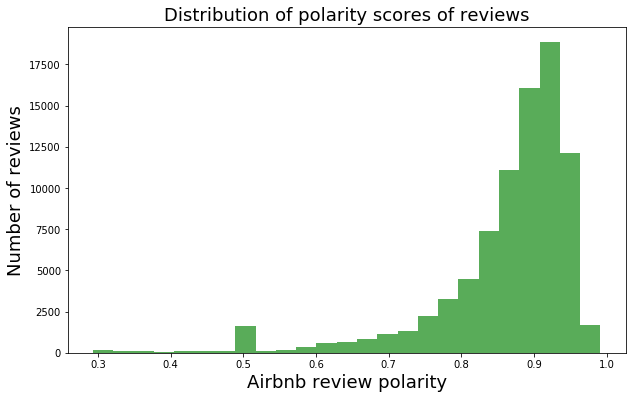

In [10]:
df_n['polarity'] = pol2 = (2 - np.sqrt(1-df_n.polarity))/2
plt.figure(figsize=(10,6))
plt.hist(pol2, bins=25, color='g', alpha=0.65)
plt.title('Distribution of polarity scores of reviews',fontsize=18)
plt.xlabel('Airbnb review polarity',fontsize=18)
plt.ylabel('Number of reviews',fontsize=18);

In [11]:
df_n.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...,0.761096
1,1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,0.941690
2,2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...,0.814595
3,3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,0.794634
4,4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,0.925167


In [12]:
list(df_n[df_n['polarity'] < 0]['comments'])

[]

In [103]:
#def f(x):
#     if x['polarity'] < 0:
#         return 1
#     elif x['polarity'] >= 0 and x['polarity'] < 0.25:
#         return 2
#     elif x['polarity'] >= 0.25 and x['polarity'] < 0.50:
#         return 3
#     elif x['polarity'] >= 0.50 and x['polarity'] < 0.75:
#         return 4
#     else:
#         return 5

In [104]:
#df_n['polarity'] = df_n.apply(f, axis=1)

In [105]:
#list(df_n[df_n['polarity']  == 1]['comments'])

In [47]:
df_n[df_n['listing_id'] == 7071222]


,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
32467,32475,7071222,41788922,2015-08-09,27751639,Maia,we are a family mother father with month ...,0.935193
32468,32476,7071222,42564630,2015-08-14,38571269,Walter,we arrive late at night ana was kind enough t...,0.899129
32469,32477,7071222,43792592,2015-08-22,7251391,Michael,the house was in a good and quiet neighborhood...,0.870096


In [107]:
### Reccommender system using SVD and surprise Lab

In [17]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import KNNBasic,KNNWithMeans
from surprise import accuracy
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import train_test_split
from collections import defaultdict
import io
from surprise.model_selection import GridSearchCV
import csv
import os
from surprise import Reader


In [15]:
df_r = df_n[['reviewer_id','listing_id','polarity']]

In [110]:
algo.predict(1,3).est

0.8621046740573681

In [111]:
df_r['predicted'] = np.vectorize(lambda a,b: algo.predict(a,b).est)(df_r.listing_id,df_r.reviewer_id)

In [116]:
df_r.nunique()

listing_id      3191
reviewer_id    75717
polarity        3689
predicted      66316
dtype: int64

In [117]:
### A reader is needed 

In [18]:
reader = Reader(rating_scale=(0,1))
data = Dataset.load_from_df(df_r,reader)

In [34]:
raw_ratings = data.raw_ratings


In [35]:

# shuffle ratings if you want
#random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

# Select your best algo with grid search.
print('Grid Search...')

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005,0.1],
              'reg_all': [0.4, 0.6], 'n_factors':[100,500]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
grid_search.fit(data)
print('best RMSE score')
print(grid_search.best_score['rmse'])

Grid Search...
best RMSE score
0.09951508957343584


In [36]:
print('Best RMSE score')
print(grid_search.best_params['rmse'])
algo = grid_search.best_estimator['rmse']

Best RMSE score
{'n_epochs': 5, 'lr_all': 0.1, 'reg_all': 0.6, 'n_factors': 100}


In [37]:
# retrain on the whole set A
trainset = data.build_full_trainset()
algo.fit(trainset)

# Compute biased accuracy on A
testset= trainset.build_testset()
predictions = algo.test(testset)
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions,verbose=True)
print('len(predictions)')
print(len(predictions))

Biased accuracy on A,   RMSE: 0.0637
len(predictions)
76347


In [38]:
estset = data.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)
print('len(predictions)')
print(len(predictions))

Unbiased accuracy on B, RMSE: 0.0637
len(predictions)
76347


In [40]:
# define a cross-validation iterator
kf = KFold(n_splits=7)
#algo = SVD(n_factors=500, n_epochs=5, lr_all=0.1)

for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    
    predictions = algo.test(testset)
    
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)


RMSE: 0.0978
RMSE: 0.0999
RMSE: 0.0983
RMSE: 0.0981
RMSE: 0.0991
RMSE: 0.0999
RMSE: 0.1012


In [41]:
def get_top3_recommendations(predictions, topN = 3):
     
    top_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
     
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]    
    return top_recs
print('getting top 3 recommendations')



getting top 3 recommendations


In [ ]:
# retrain on the whole set A
trainset = data.build_full_trainset()
algo.fit(trainset)

testset= trainset.build_anti_testset()
predictionsAll = algo.test(testset)
print('Accuracy on whole data set,', end='   ')
accuracy.rmse(predictionsAll,verbose=True)
print('len(predictions)')
print(len(predictionsAll))

In [44]:
top3_recommendations = get_top3_recommendations(predictions,3)


In [45]:
dfo = pd.DataFrame(columns=['UserId', 'Recommended Listing,Rating'])
i=0;
for uid, user_ratings in top3_recommendations.items():
    #print(uid, top3_recommendations[uid])
    row = [uid, top3_recommendations[uid]]
    dfo.loc[i] = row
    i=i+1
dfo.to_csv('suissionF.csv', index = False)

print("wrote Recommendations for each user in csv file")   

wrote Recommendations for each user in csv file


In [46]:
dfo.head()

,UserId,"Recommended Listing,Rating"
0,7251391,"[(7071222, 0.8932254511482973)]"
1,1304157,"[(153967, 0.8714421881581831)]"
2,25802217,"[(2130652, 0.8661726115713786)]"
3,1711209,"[(1133329, 0.8739843425652043)]"
4,21265832,"[(2418658, 0.8779963211004567)]"


In [ ]:
# algo = SVD(verbose=True)
# #Running 5-fold cv 
# cross_validate(algo, data, measures=['RMSE','MAE'],cv=5, n_jobs=-1,verbose=True)


In [ ]:
# # let's do train-test-split, where test set is 25% of the ratings
# trainset, testset = train_test_split(data, test_size=.25)

# # Train the algorithm on the trainset, and predict ratings for the testset
# algo.fit(trainset)
# predictions = algo.test(testset)

In [ ]:
# uid = np.array([x[0] for x in testset])
# iid = np.array([x[1] for x in testset])
# score = np.array([x[2] for x in testset])

In [22]:
# prediction2 = np.vectorize(algo.predict)(uid,iid)

In [23]:
# prediction2[3]

array([0.77726641, 0.81912837, 0.89481741, ..., 0.81502627, 0.81495293,
       0.88905742])

In [48]:
# plt.figure(figsize=(10,6))
# plt.scatter(df_r['predicted'],df_r['polarity'] , alpha=0.01)
# plt.title('Predicted vs Actual using Surprise',fontsize=18)
# plt.xlabel('Predicted',fontsize=18)
# plt.ylabel('Actual',fontsize=18);

In [25]:
# accuracy.rmse(predictions)

RMSE: 0.1044


0.1043793312474393

In [26]:
def get_top3_recommendations(predictions, topN = 3):
     
    top_recs = defaultdict(list)
    for iid, uid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
     
    for iid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]    
    return top_recs
print('getting top 3 recommendations')


getting top 3 recommendations


In [27]:
top3_recommendations = get_top3_recommendations(predictions,3)

print('Total predictions calculated are %d' % len(predictions))

Total predictions calculated are 21208


In [28]:
# dfo = pd.DataFrame(columns=['UserId', 'Recommended Listing,Rating'])
# i = 0                           
# for uid, user_ratings in top3_recommendations.items():
#     #print(uid, top3_recommendations[uid])
#     row = [uid, top3_recommendations[uid]]
#     dfo.loc[i] = row
#     i=i+1

# dfo.to_csv('submissionF.csv', index = False)

# print("wrote Recommendations for each user in csv file")

wrote Recommendations for each user in csv file


In [29]:
# for row in dfo['Recommended Listing,Rating']:
#     zip(*row)

In [49]:
# dfo[['Recommended Listing1']] = pd.DataFrame(dfo['Recommended Listing,Rating'].tolist(), index=dfo.index)